## Daten Einlesen und Überblick

In [37]:
import pandas as pd
import numpy as np

# Einlesen der Daten
data = pd.read_csv('autoscout24.csv')

# Überblick über die Daten
print(data.head())
print(data.info())
print(data.describe())


   mileage        make   model      fuel    gear offerType  price     hp  year
0   235000         BMW     316    Diesel  Manual      Used   6800  116.0  2011
1    92800  Volkswagen    Golf  Gasoline  Manual      Used   6877  122.0  2011
2   149300        SEAT    Exeo  Gasoline  Manual      Used   6900  160.0  2011
3    96200     Renault  Megane  Gasoline  Manual      Used   6950  110.0  2011
4   156000     Peugeot     308  Gasoline  Manual      Used   6950  156.0  2011
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46

### Das Column make in brand umbennen

In [38]:
data = data.rename(columns = {'make' : 'brand'})

In [39]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   brand      46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB
None


## Datenanalyse und Visualisierung

In [40]:
# Anzahl der Autos
total_autos_sold = len(data)
print(f"Anzahl der verkauften Autos: {total_autos_sold}")

# Zeitraum ermitteln (z.B. anhand der Spalte 'year', falls vorhanden)
if 'year' in data.columns:
    time_period = (data['year'].min(), data['year'].max())
    print(f"Zeitraum der Verkäufe: {time_period[0]} bis {time_period[1]}")
else:
    print("Keine 'year'-Spalte im Datensatz gefunden.")


Anzahl der verkauften Autos: 46405
Zeitraum der Verkäufe: 2011 bis 2021


### Erfasste Automarken und deren Analyse

In [41]:
# Automarken auflisten
brands = data['brand'].unique()
print("Erfasste Marken:", brands)


Erfasste Marken: ['BMW' 'Volkswagen' 'SEAT' 'Renault' 'Peugeot' 'Toyota' 'Opel' 'Mazda'
 'Ford' 'Mercedes-Benz' 'Chevrolet' 'Audi' 'Fiat' 'Kia' 'Dacia' 'MINI'
 'Hyundai' 'Skoda' 'Citroen' 'Infiniti' 'Suzuki' 'SsangYong' 'smart'
 'Cupra' 'Volvo' 'Jaguar' 'Porsche' 'Nissan' 'Honda' 'Lada' 'Mitsubishi'
 'Others' 'Lexus' 'Jeep' 'Maserati' 'Bentley' 'Land' 'Alfa' 'Subaru'
 'Dodge' 'Microcar' 'Lamborghini' 'Baic' 'Tesla' 'Chrysler' '9ff'
 'McLaren' 'Aston' 'Rolls-Royce' 'Alpine' 'Lancia' 'Abarth' 'DS'
 'Daihatsu' 'Ligier' 'Ferrari' 'Caravans-Wohnm' 'Aixam' 'Piaggio' 'Zhidou'
 'Morgan' 'Maybach' 'Tazzari' 'Trucks-Lkw' 'RAM' 'Iveco' 'DAF' 'Alpina'
 'Polestar' 'Brilliance' 'FISKER' 'Cadillac' 'Trailer-Anhänger' 'Isuzu'
 'Corvette' 'DFSK' 'Estrima']


### Korrelationsanalyse und Scatterplots für numerische Features

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

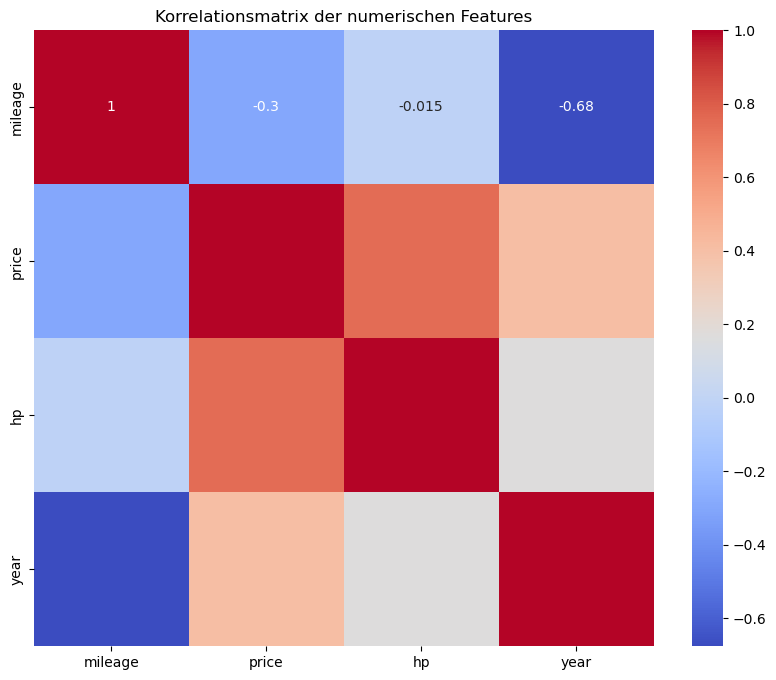

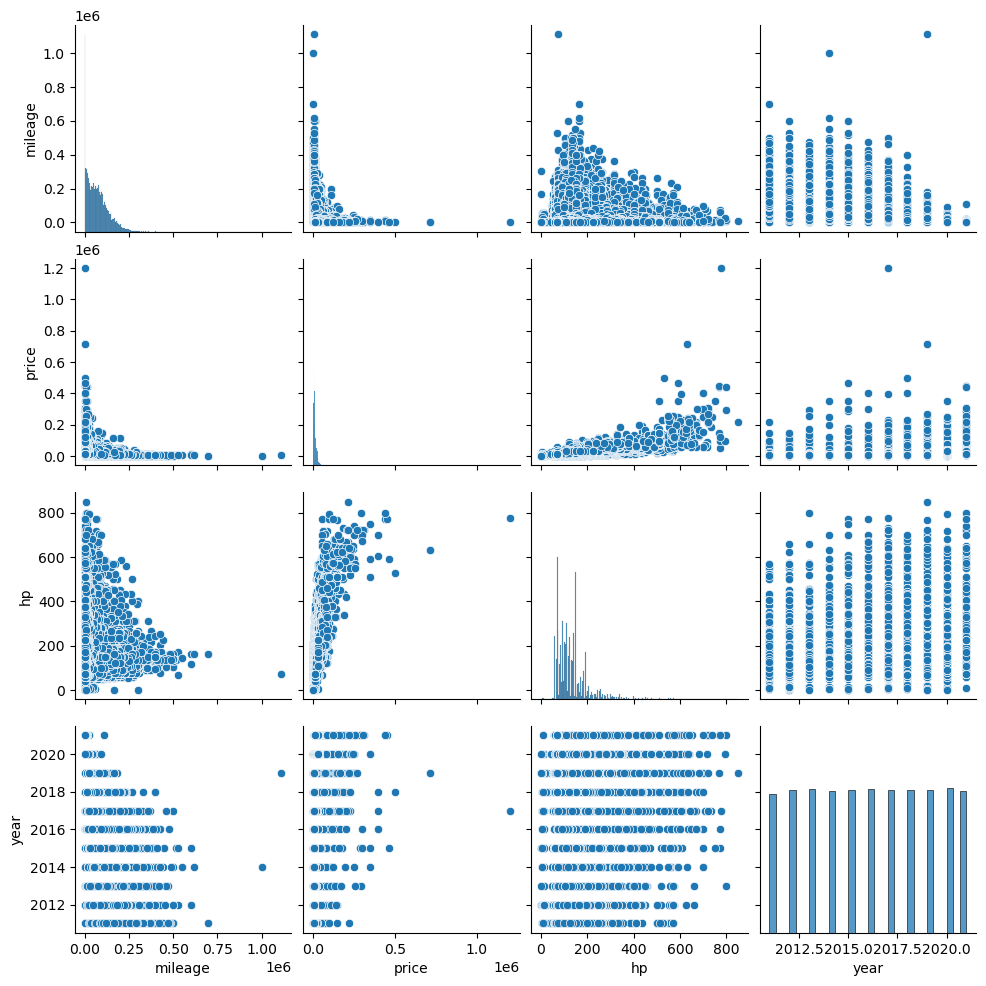

In [43]:
# Korrelationen der numerischen Features
plt.figure(figsize=(10, 8))
sns.heatmap(data.select_dtypes(include=[float, int]).corr(), annot=True, cmap='coolwarm')
plt.title("Korrelationsmatrix der numerischen Features")
plt.show()

# Scatterplot-Matrix der numerischen Features
sns.pairplot(data.select_dtypes(include=[float, int]))
plt.show()

### Veränderungen über die Jahre analysieren

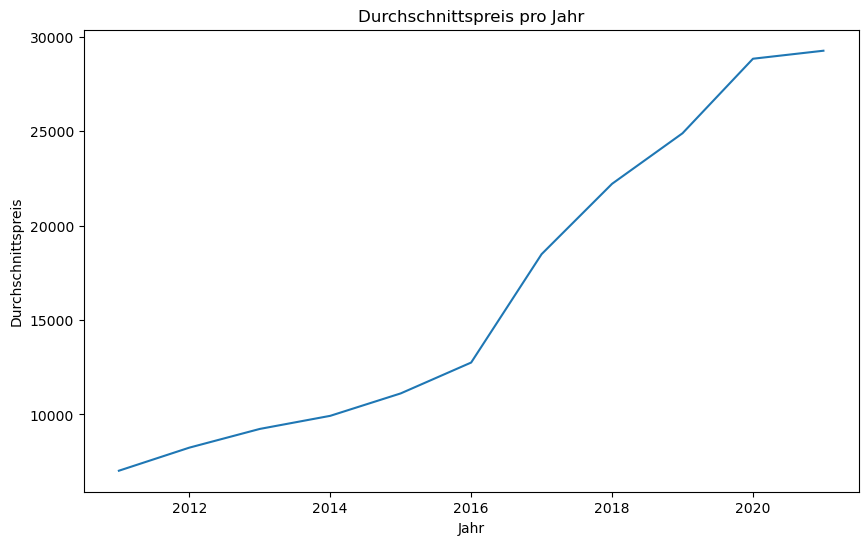

In [44]:
# Durchschnittspreis pro Jahr
yearly_prices = data.groupby('year')['price'].mean()
plt.figure(figsize=(10, 6))
yearly_prices.plot(kind='line')
plt.title("Durchschnittspreis pro Jahr")
plt.xlabel("Jahr")
plt.ylabel("Durchschnittspreis")
plt.show()


### Durchschnittlicher Kilometerstand pro Marke

Durchschnittlicher Kilometerstand pro Marke:
brand
9ff            39500.000000
Abarth         25528.418605
Aixam            403.333333
Alfa           70702.265152
Alpina         45362.000000
                  ...      
Trucks-Lkw    312000.000000
Volkswagen     80802.309335
Volvo          67107.405473
Zhidou          3000.000000
smart          50248.197125
Name: mileage, Length: 77, dtype: float64


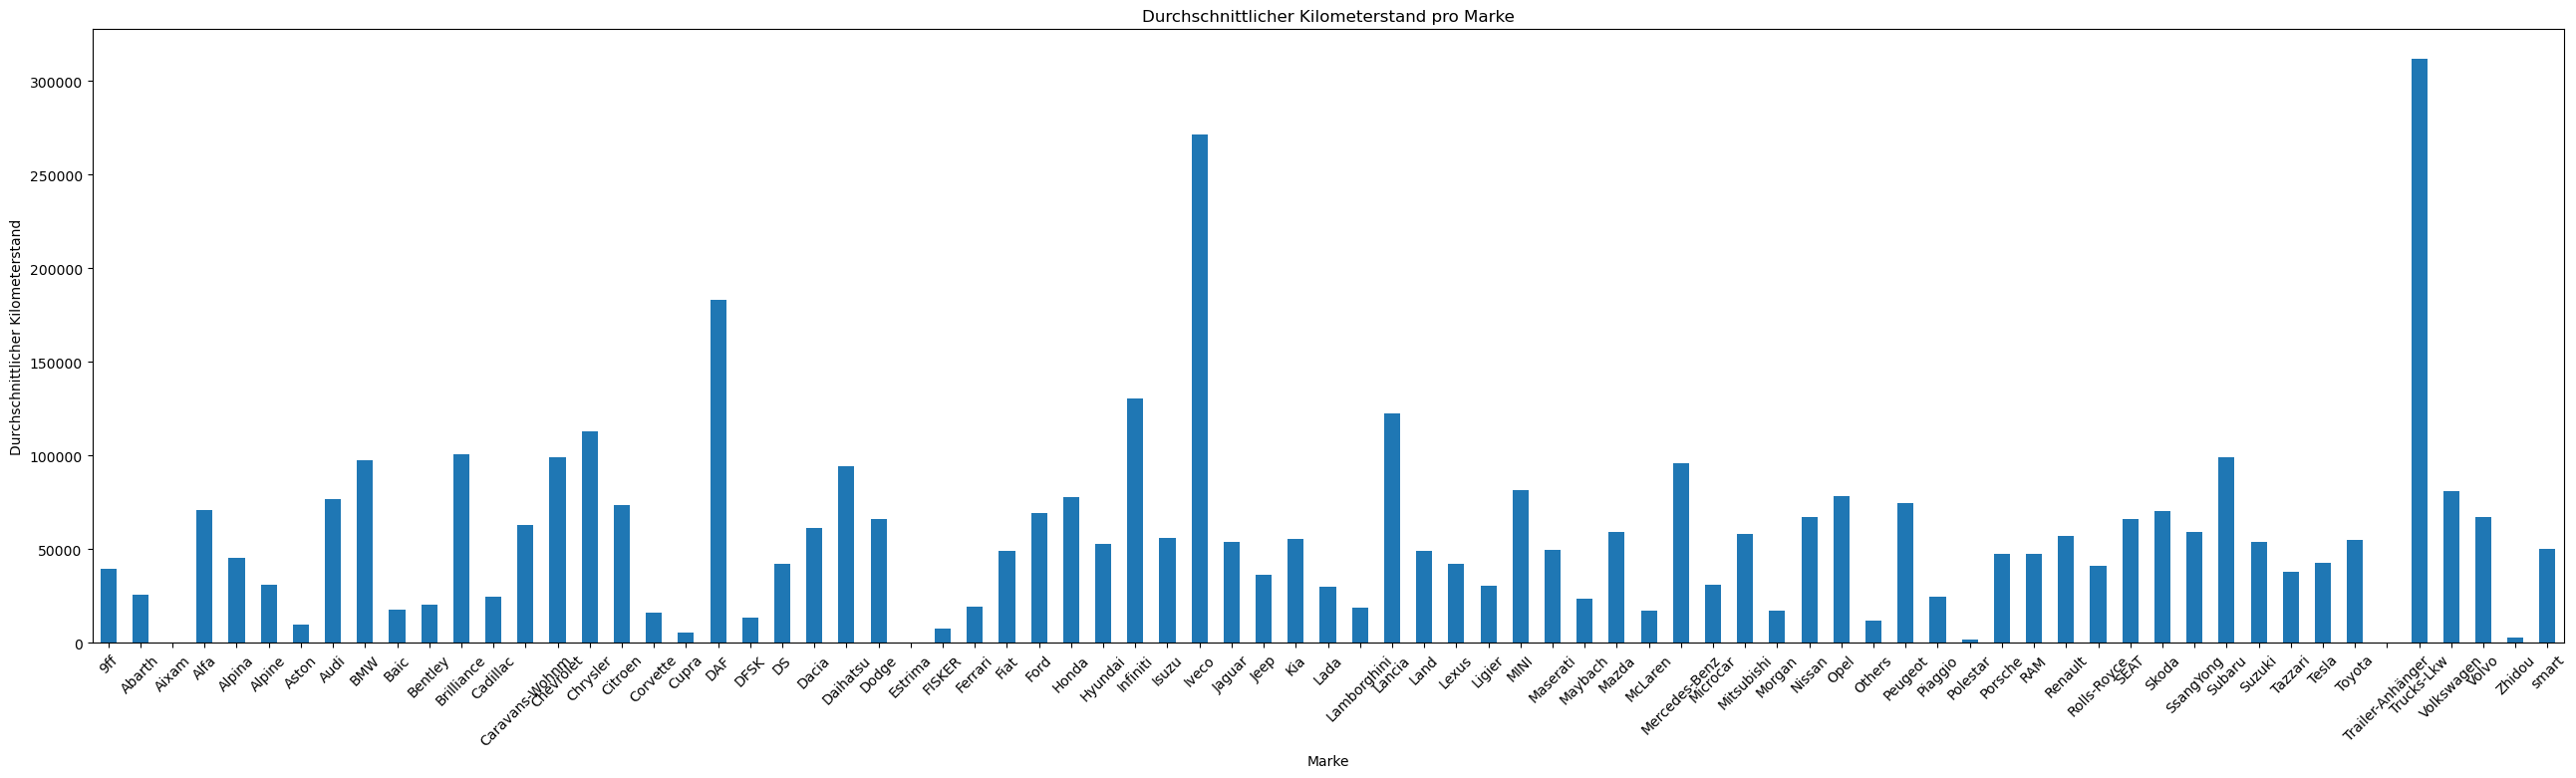

In [45]:
# Durchschnittlicher Kilometerstand pro Marke
avg_mileage_per_brand = data.groupby('brand')['mileage'].mean()
print("Durchschnittlicher Kilometerstand pro Marke:")
print(avg_mileage_per_brand)

# Visualisierung des durchschnittlichen Kilometerstands pro Marke
plt.figure(figsize=(32, 8))
avg_mileage_per_brand.plot(kind='bar')
plt.title("Durchschnittlicher Kilometerstand pro Marke")
plt.xlabel("Marke")
plt.ylabel("Durchschnittlicher Kilometerstand")
plt.xticks(rotation=45)
plt.show()


### Häufigste Modelltypen

Top 10 häufigste Modelltypen:
model
Golf      1492
Corsa     1491
Fiesta    1289
Astra     1191
Focus      985
up!        945
Fabia      917
Polo       893
forTwo     725
500        666
Name: count, dtype: int64


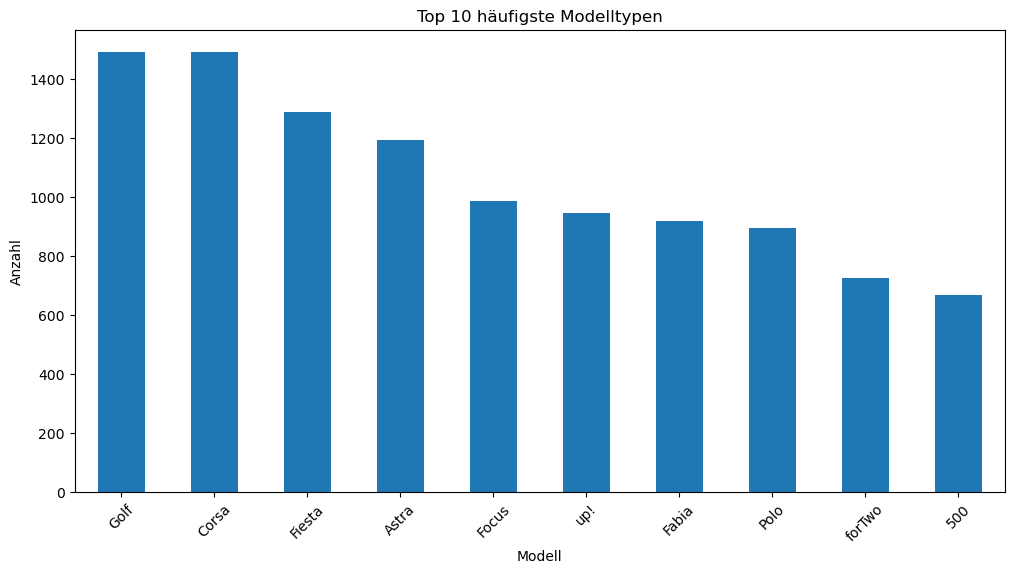

In [46]:
# Häufigste Modelltypen
top_models = data['model'].value_counts().head(10)
print("Top 10 häufigste Modelltypen:")
print(top_models)

# Visualisierung der häufigsten Modelle
plt.figure(figsize=(12, 6))
top_models.plot(kind='bar')
plt.title("Top 10 häufigste Modelltypen")
plt.xlabel("Modell")
plt.ylabel("Anzahl")
plt.xticks(rotation=45)
plt.show()


### Durchschnittliche Preisentwicklung in Abhängigkeit von Kilometerstand oder Motorleistung

Durchschnittspreis nach Kilometerstand:
mileage
(0, 50000]          23376.993097
(50000, 100000]     12798.026431
(100000, 150000]    10043.839468
(150000, 200000]     8871.063284
(200000, 250000]     8246.068288
(250000, 300000]     7786.851312
(300000, 350000]     6965.696629
(350000, 400000]     6857.825397
(400000, 450000]     6535.631579
(450000, 500000]     5656.944444
(500000, 550000]     6399.750000
(550000, 600000]     9534.000000
(600000, 650000]     6500.000000
(650000, 700000]     3990.000000
Name: price, dtype: float64


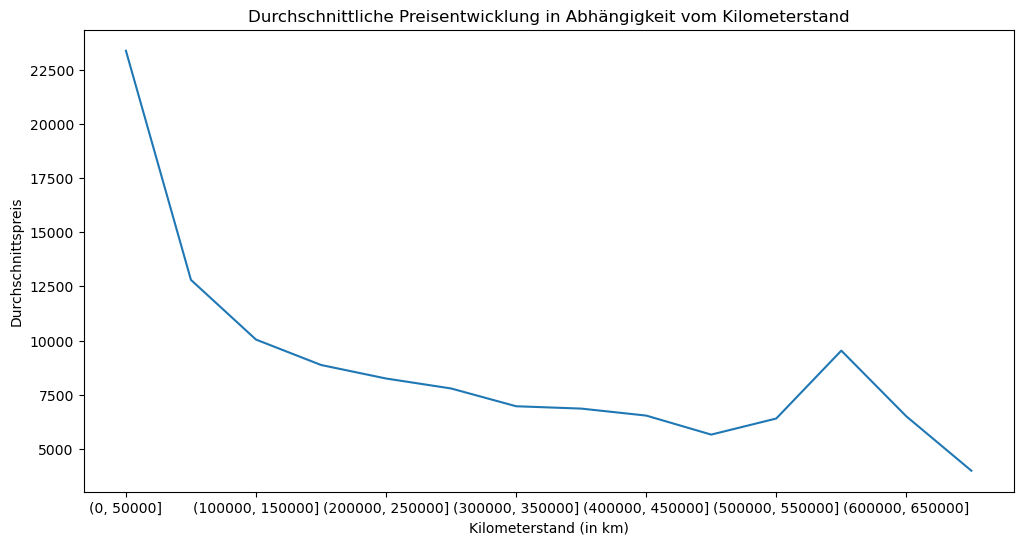

In [47]:
# Benutzerdefinierte Bins für den Kilometerstand von 0 bis 1.000.000 in Schritten von 100.000
bins = np.arange(0, 700001, 50000)

# Durchschnittspreis in Abhängigkeit vom Kilometerstand berechnen
mileage_price = data.groupby(pd.cut(data['mileage'], bins=bins))['price'].mean()
print("Durchschnittspreis nach Kilometerstand:")
print(mileage_price)

# Visualisierung der Preisentwicklung in Abhängigkeit vom Kilometerstand
plt.figure(figsize=(12, 6))
mileage_price.plot(kind='line')  # Entfernen von 'marker' für durchgehende Linie
plt.title("Durchschnittliche Preisentwicklung in Abhängigkeit vom Kilometerstand")
plt.xlabel("Kilometerstand (in km)")
plt.ylabel("Durchschnittspreis")
#plt.xlim(0, 1000000)  # X-Achse auf 0 bis 1.000.000 festlegen
plt.show()

Durchschnittspreis nach Motorleistung:
hp
(0.151, 85.9]       8011.396278
(85.9, 170.8]      13351.117654
(170.8, 255.7]     27637.114205
(255.7, 340.6]     40631.789219
(340.6, 425.5]     61324.808333
(425.5, 510.4]     81478.306785
(510.4, 595.3]    111367.562500
(595.3, 680.2]    151257.854369
(680.2, 765.1]    221912.590909
(765.1, 850.0]    324115.181818
Name: price, dtype: float64


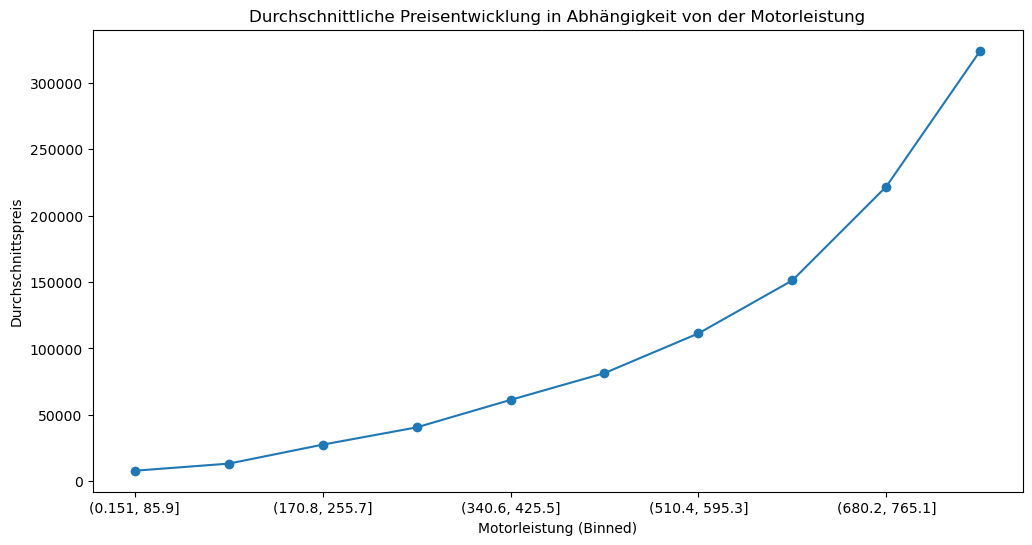

In [48]:
# Durchschnittspreis in Abhängigkeit von der Motorleistung
hp_price = data.groupby(pd.cut(data['hp'], bins=10))['price'].mean()
print("Durchschnittspreis nach Motorleistung:")
print(hp_price)

# Visualisierung der Preisentwicklung in Abhängigkeit von der Motorleistung
plt.figure(figsize=(12, 6))
hp_price.plot(kind='line', marker='o')
plt.title("Durchschnittliche Preisentwicklung in Abhängigkeit von der Motorleistung")
plt.xlabel("Motorleistung (Binned)")
plt.ylabel("Durchschnittspreis")
plt.show()


## Machine Learning

Die 5 meistverkauften Hersteller: Index(['Volkswagen', 'Opel', 'Ford', 'Skoda', 'Renault'], dtype='object', name='brand')


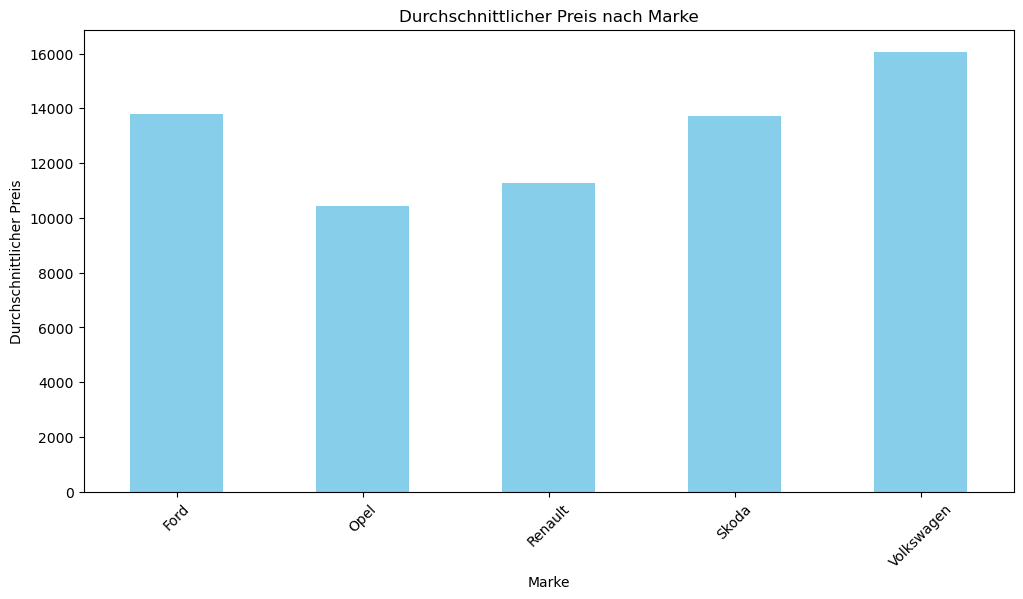

In [49]:
# Top 5 meistverkaufte Marken
top_5_brands = data['brand'].value_counts().head(5).index
data_top_brands = data[data['brand'].isin(top_5_brands)]
print("Die 5 meistverkauften Hersteller:", top_5_brands)

# Durchschnittspreis für jede der Top-5-Marken berechnen
average_price_top_brands = data_top_brands.groupby('brand')['price'].mean()

# Visualisierung des durchschnittlichen Preises nach Marke
plt.figure(figsize=(12, 6))
average_price_top_brands.plot(kind='bar', color='skyblue')
plt.title("Durchschnittlicher Preis nach Marke")
plt.xlabel("Marke")
plt.ylabel("Durchschnittlicher Preis")
plt.xticks(rotation=45)
plt.show()


Die 5 meistverkauften Hersteller: Index(['Volkswagen', 'Opel', 'Ford', 'Skoda', 'Renault'], dtype='object', name='brand')


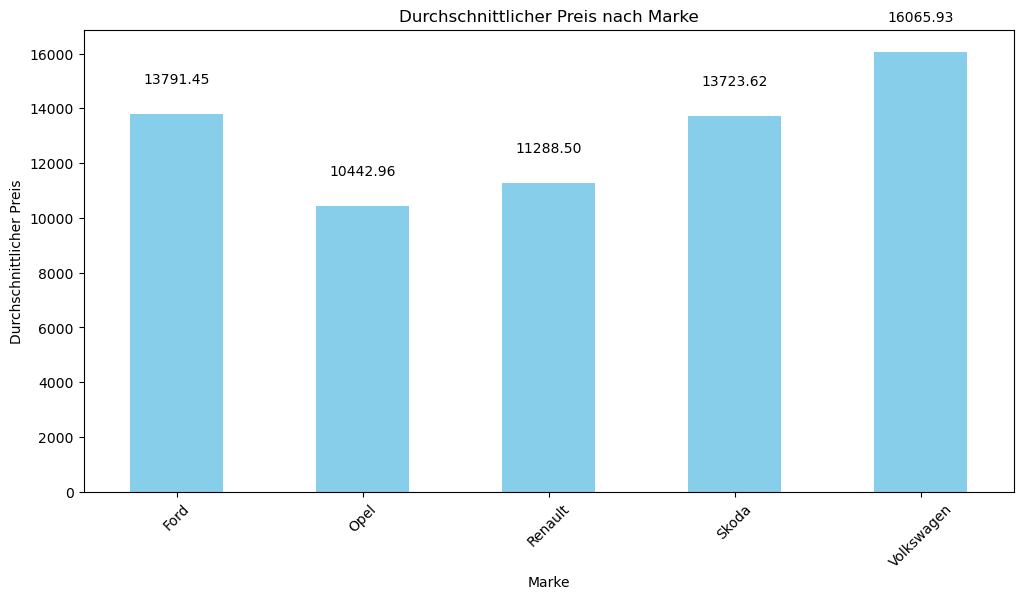

Durchschnittspreis pro Hersteller:
brand
Ford          13791.45
Opel          10442.96
Renault       11288.50
Skoda         13723.62
Volkswagen    16065.93
Name: price, dtype: float64


In [50]:
top_5_brands = data['brand'].value_counts().head(5).index
data_top_brands = data[data['brand'].isin(top_5_brands)]
print("Die 5 meistverkauften Hersteller:", top_5_brands)

# Durchschnittspreis für jede der Top-5-Marken berechnen
average_price_top_brands = data_top_brands.groupby('brand')['price'].mean()

# Visualisierung des durchschnittlichen Preises nach Marke
plt.figure(figsize=(12, 6))
bars = average_price_top_brands.plot(kind='bar', color='skyblue')
plt.title("Durchschnittlicher Preis nach Marke")
plt.xlabel("Marke")
plt.ylabel("Durchschnittlicher Preis")
plt.xticks(rotation=45)

# Durchschnittswerte in den Balken anzeigen
for i, v in enumerate(average_price_top_brands):
    plt.text(i, v + 1000, f"{v:.2f}", ha='center', va='bottom', fontsize=10)

plt.show()

# Durchschnittspreis pro Hersteller (nur zur Konsolenansicht)
print("Durchschnittspreis pro Hersteller:")
print(average_price_top_brands.round(2))

### Modelltraining Lineare Regression

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Mean Squared Error (MSE): 22348633.579740997
Root Mean Squared Error (RMSE): 4727.434143353136
Mean Absolute Error (MAE): 3013.9408580249897
R2 Score (R2): 0.7602349450430372


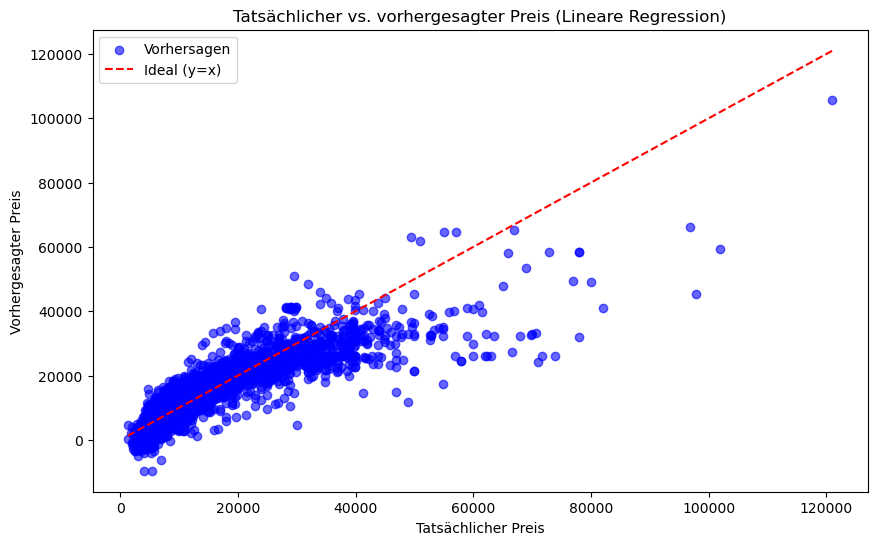

In [56]:

# Feature-Auswahl und Zielvariable
features = ['mileage', 'hp', 'year']  # Beispielhafte Auswahl
target = 'price'

# Extrahieren der Features und Zielvariable
X = data_top_brands[features]
y = data_top_brands[target]

# Fehlende Werte behandeln
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Lineare Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Mean Squared Error zur Modellbewertung
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

r2 = r2_score(y_test, y_pred)
print("R2 Score (R2):", r2)

# Visualisierung: Tatsächliche vs. vorhergesagte Preise
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label="Vorhersagen")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal (y=x)")
plt.xlabel("Tatsächlicher Preis")
plt.ylabel("Vorhergesagter Preis")
plt.title("Tatsächlicher vs. vorhergesagter Preis (Lineare Regression)")
plt.legend()
plt.show()


Mean Squared Error (MSE): 10939304.4414437
Root Mean Squared Error (RMSE): 3307.461933483695
Mean Absolute Error (MAE): 1777.7388739970413
R²-Score: 0.8826387787318095


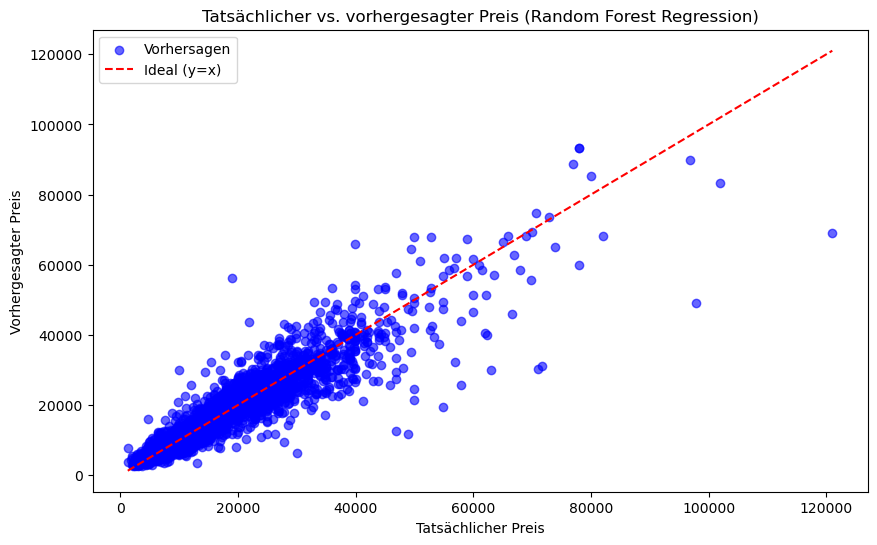

In [58]:

from sklearn.ensemble import RandomForestRegressor

# Features und Zielvariable definieren, inklusive nicht-numerischer Spalten
features = ['mileage', 'hp', 'year', 'gear', 'brand']  # gear und brand als nicht-numerische Beispiele
target = 'price'

# Nur relevante Spalten extrahieren
data_features = data_top_brands[features]
y = data_top_brands[target]

# Umwandlung der nicht-numerischen Features in numerische mit One-Hot-Encoding
X = pd.get_dummies(data_features, columns=['gear', 'brand'], drop_first=True)

# Fehlende Werte behandeln
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Modellbewertung
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Auswertungsergebnisse anzeigen
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R²-Score:", r2)

# Visualisierung: Tatsächliche vs. vorhergesagte Preise
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label="Vorhersagen")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal (y=x)")
plt.xlabel("Tatsächlicher Preis")
plt.ylabel("Vorhergesagter Preis")
plt.title("Tatsächlicher vs. vorhergesagter Preis (Random Forest Regression)")
plt.legend()
plt.show()

Mean Squared Error (MSE): 28735781.213511866
Root Mean Squared Error (RMSE): 5360.576574727001
Mean Absolute Error (MAE): 3329.0545343883136
R²-Score: 0.691711077668097


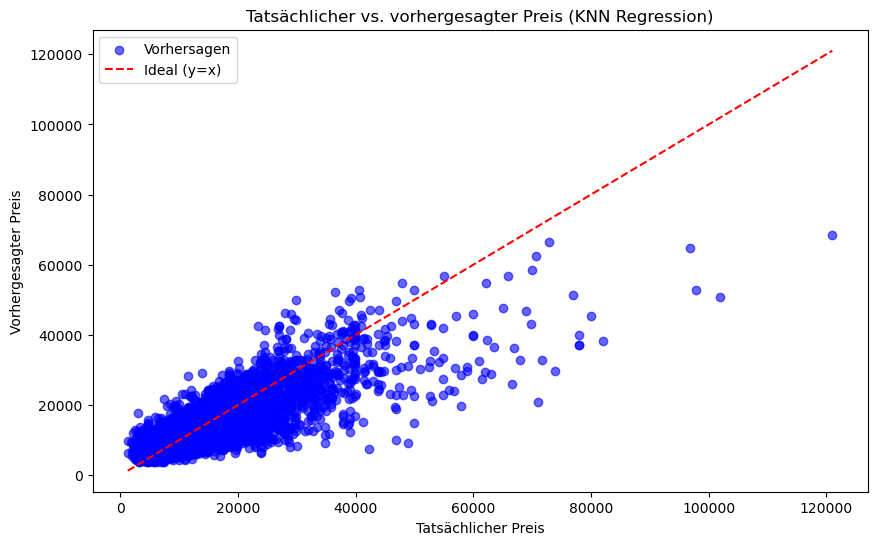

In [59]:

from sklearn.neighbors import KNeighborsRegressor


# Auswahl aller Features, die im Datensatz verfügbar sind (numerisch und nicht-numerisch)
features = data_top_brands.columns.drop('price')  # Alle Spalten außer 'price'
target = 'price'

# Nur relevante Spalten extrahieren
data_features = data_top_brands[features]
y = data_top_brands[target]

# Umwandlung der nicht-numerischen Features in numerische mit One-Hot-Encoding
X = pd.get_dummies(data_features, drop_first=True)

# Fehlende Werte behandeln
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# K-Nearest Neighbors Regressor (k=5 als Beispiel)
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Modellbewertung
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Bewertungsergebnisse anzeigen
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R²-Score:", r2)

# Visualisierung: Tatsächliche vs. vorhergesagte Preise
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label="Vorhersagen")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal (y=x)")
plt.xlabel("Tatsächlicher Preis")
plt.ylabel("Vorhergesagter Preis")
plt.title("Tatsächlicher vs. vorhergesagter Preis (KNN Regression)")
plt.legend()
plt.show()
